In [1]:
from DiffEqPy import Variable, DataLoader
from DiffEqPy.functions import *
from DiffEqPy.utils import *
from DiffEqPy.layers import *
from DiffEqPy.models import MLP
from DiffEqPy.optimizers import SGD
from DiffEqPy.datasets import *
import DiffEqPy
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def f(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.
    return x

In [3]:
batch_size = 100
max_epoch = 10
hidden_size = 1000

train_set = MNIST(train = True, transform=f)
test_set = MNIST(train = False, transform=f)
train_loader = DataLoader(train_set , batch_size)
test_loader = DataLoader(test_set , batch_size, shuffle=False)

model = MLP((hidden_size, hidden_size,10))
#model = MLP((hidden_size, hidden_size,10), activation=F.relu)
optimizer = SGD().setup(model)

In [4]:
x = np.array([val[0] for val in train_set])
t = np.array([val[1] for val in train_set])

In [5]:
ret = {}
ret["train_loss"] = []
ret["test_loss"] = []
ret["train_accuracy"] = []
ret["test_accuracy"] = []

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0    
    
    for x,t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy_simple(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)
        
    print("epoch %d " % (epoch+1))
    print("train loss: {:.4f}, accuracy: {:.4f}".format(sum_loss / len(train_set), sum_acc / len(train_set)))
    ret["train_loss"].append(sum_loss / len(train_set))
    ret["train_accuracy"].append(sum_acc / len(train_set))
        
    sum_loss, sum_acc = 0,0
    with DiffEqPy.no_grad():
        for x,t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy_simple(y, t)
            acc = F.accuracy(y,t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
    print("test loss: {:.4f}, accuracy: {:.4f}".format(sum_loss / len(test_set), sum_acc / len(test_set)))
    ret["test_loss"].append(sum_loss / len(test_set))
    ret["test_accuracy"].append(sum_acc / len(test_set))

epoch 1 
train loss: 2.2678, accuracy: 0.1723
test loss: 2.2268, accuracy: 0.3412
epoch 2 
train loss: 2.1723, accuracy: 0.3681
test loss: 2.1058, accuracy: 0.4217
epoch 3 
train loss: 2.0208, accuracy: 0.5160
test loss: 1.9146, accuracy: 0.4756
epoch 4 
train loss: 1.7717, accuracy: 0.6151
test loss: 1.6028, accuracy: 0.6466
epoch 5 
train loss: 1.4530, accuracy: 0.6848
test loss: 1.2789, accuracy: 0.7384
epoch 6 
train loss: 1.1710, accuracy: 0.7383
test loss: 1.0403, accuracy: 0.7633
epoch 7 
train loss: 0.9719, accuracy: 0.7771
test loss: 0.8795, accuracy: 0.7947
epoch 8 
train loss: 0.8353, accuracy: 0.7990
test loss: 0.7644, accuracy: 0.8085
epoch 9 
train loss: 0.7381, accuracy: 0.8169
test loss: 0.6812, accuracy: 0.8289
epoch 10 
train loss: 0.6659, accuracy: 0.8308
test loss: 0.6231, accuracy: 0.8380


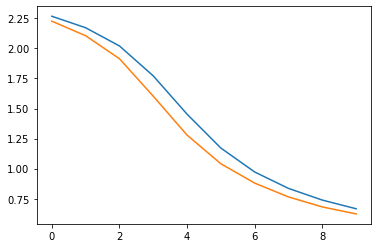

In [6]:
plt.plot(ret["train_loss"])
plt.plot(ret["test_loss"])

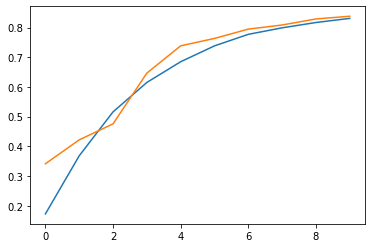

In [7]:
plt.plot(ret["train_accuracy"])
plt.plot(ret["test_accuracy"])

In [9]:
model.plot(x)